In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyBigWig
import tqdm
from plotnine import *

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
from plotnine import *

In [39]:
def calculate_total_signal(bw_path):
    bw = pyBigWig.open(bw_path, "r")
    total_signal = bw.header()['sumData']
    
    return total_signal

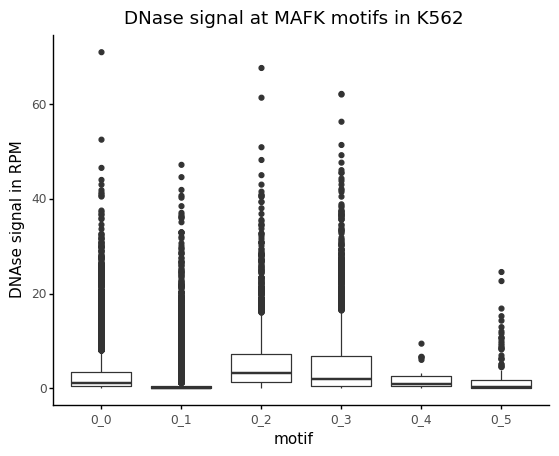

/users/vir/anaconda3/envs/basepairmodels_latest/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/users/vir/anaconda3/envs/basepairmodels_latest/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: DNase_signal_at_MAFK_motifs_in_K562.pdf


In [40]:
all_motif_coords = pd.read_csv("/oak/stanford/groups/akundaje/amtseng/tfmodisco/results/best_models_bigwigs/tfm_motif_hits_filtered/MAFK_task6_count_tfm_motif_hits_filtered.bed.gz",sep="\t",header=None)
# dhs_bw_path = '/mnt/lab_data2/vir/modisco_project/ATAC_DHS_profiles/atac_and_dnase_at_motifs/data/ENCFF414OGC.bigWig'
bw_path = '/srv/www/kundaje/anusri/encode_model_dnase_k562/K562_unstranded.bw'
calculation_width = 500
bw = pyBigWig.open(bw_path)

total_signal = calculate_total_signal(bw_path)
norm_factor = 1000000/total_signal
scores = []

for i,row in all_motif_coords.iterrows():
    scores.append({"signal":(np.nan_to_num(np.asarray(bw.values(all_motif_coords.iloc[i,0], all_motif_coords.iloc[i,1]-(calculation_width//2), all_motif_coords.iloc[i,1]+(calculation_width//2)))).sum())*(norm_factor),'motif':all_motif_coords.iloc[i,3]})
        
score_df = pd.DataFrame(scores)
plot=(ggplot(score_df,aes('motif','signal'))
          +geom_boxplot()
          +theme_classic()
          +scale_y_continuous(name ="DNAse signal in RPM")
          +labs(title="DNase signal at MAFK motifs in K562")  
     )
print(plot) 
plot.save("DNase_signal_at_MAFK_motifs_in_K562.pdf")    

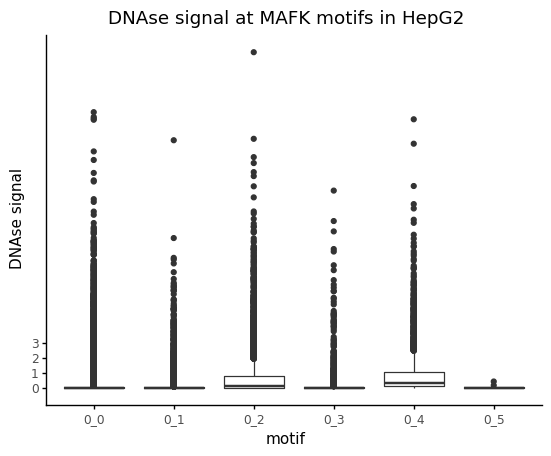

<ggplot: (8776109584021)>


/users/vir/miniconda2/envs/basepairmodels_latest/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/users/vir/miniconda2/envs/basepairmodels_latest/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: DNAse_signal_at_MAFK_motifs_in_HepG2.pdf


In [49]:
# all_motif_coords = pd.read_csv("/oak/stanford/groups/akundaje/amtseng/tfmodisco/results/best_models_bigwigs/tfm_motif_hits_filtered/MAFK_task3_count_tfm_motif_hits_filtered.bed.gz",sep="\t",header=None)
# dhs_bw_path = '/mnt/lab_data2/vir/modisco_project/ATAC_DHS_profiles/atac_and_dnase_at_motifs/data/ENCFF113VII.bigWig'
# calculation_width = 500
# bw = pyBigWig.open(dhs_bw_path)

# scores = []

# for i,row in all_motif_coords.iterrows():
#     value = bw.values(all_motif_coords.iloc[i,0], all_motif_coords.iloc[i,1]-(calculation_width//2), all_motif_coords.iloc[i,1]+(calculation_width//2))
#     if(row[4]=='-'):
#         if len(value) == calculation_width:
#             scores.append({"signal":np.flip(np.asarray(bw.values(all_motif_coords.iloc[i,0], all_motif_coords.iloc[i,1]-(calculation_width//2), all_motif_coords.iloc[i,1]+(calculation_width//2)))).mean(),'motif':all_motif_coords.iloc[i,3]})
#     else:
#         if len(value) == calculation_width:
#             scores.append({"signal":np.asarray(bw.values(all_motif_coords.iloc[i,0], all_motif_coords.iloc[i,1]-(calculation_width//2), all_motif_coords.iloc[i,1]+(calculation_width//2))).mean(),'motif':all_motif_coords.iloc[i,3]})
        
# score_df = pd.DataFrame(scores)
# plot=(ggplot(score_df,aes('motif','signal'))
#           +geom_boxplot()
#           +theme_classic()
#           +scale_y_continuous(name ="DNAse signal", breaks = (0,1,2,3))
#           +labs(title="DNAse signal at MAFK motifs in HepG2")  
#      )
# print(plot) 
# plot.save("DNAse_signal_at_MAFK_motifs_in_HepG2.pdf")

In [41]:
calculate_total_signal('/srv/www/kundaje/anusri/encode_model_dnase_k562/K562_unstranded.bw')

332633228

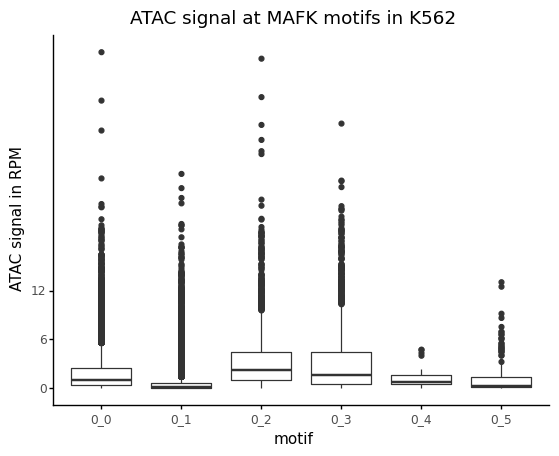

/users/vir/anaconda3/envs/basepairmodels_latest/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/users/vir/anaconda3/envs/basepairmodels_latest/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ATAC_signal_at_MAFK_motifs_in_K562.pdf


In [42]:
all_motif_coords = pd.read_csv("/oak/stanford/groups/akundaje/amtseng/tfmodisco/results/best_models_bigwigs/tfm_motif_hits_filtered/MAFK_task6_count_tfm_motif_hits_filtered.bed.gz",sep="\t",header=None)
# bw_path = '/mnt/lab_data2/vir/modisco_project/ATAC_DHS_profiles/atac_and_dnase_at_motifs/data/ENCFF102ARJ.bigWig'
bw_path = '/srv/www/kundaje/anusri/encode_fig_tracks/k562.oberved.bw'
calculation_width = 500
bw = pyBigWig.open(bw_path)

total_signal = calculate_total_signal(bw_path)
norm_factor = 1000000/total_signal
scores = []

for i,row in all_motif_coords.iterrows():
    scores.append({"signal":(np.nan_to_num(np.asarray(bw.values(all_motif_coords.iloc[i,0], all_motif_coords.iloc[i,1]-(calculation_width//2), all_motif_coords.iloc[i,1]+(calculation_width//2)))).sum())*(norm_factor),'motif':all_motif_coords.iloc[i,3]})

        
score_df = pd.DataFrame(scores)
plot=(ggplot(score_df,aes('motif','signal'))
          +geom_boxplot()
          +theme_classic()
          +scale_y_continuous(name ="ATAC signal in RPM", breaks = (0,6,12))
          +labs(title="ATAC signal at MAFK motifs in K562")  
     )
print(plot) 
plot.save("ATAC_signal_at_MAFK_motifs_in_K562.pdf")    

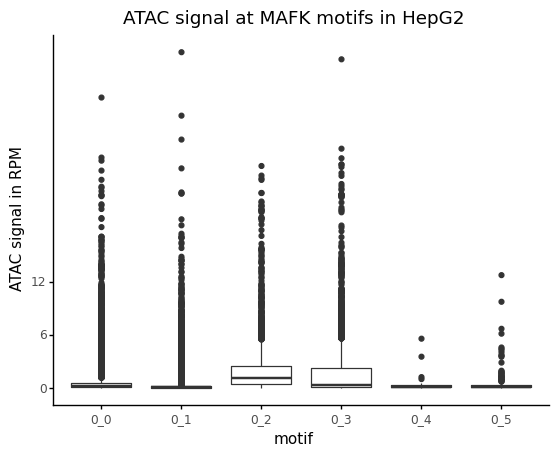

/users/vir/anaconda3/envs/basepairmodels_latest/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/users/vir/anaconda3/envs/basepairmodels_latest/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ATAC_signal_at_MAFK_motifs_in_HepG2.pdf


In [43]:
all_motif_coords = pd.read_csv("/oak/stanford/groups/akundaje/amtseng/tfmodisco/results/best_models_bigwigs/tfm_motif_hits_filtered/MAFK_task6_count_tfm_motif_hits_filtered.bed.gz",sep="\t",header=None)
# bw_path = '/mnt/lab_data2/vir/modisco_project/ATAC_DHS_profiles/atac_and_dnase_at_motifs/data/ENCFF664EJT.bigWig'
bw_path = '/srv/www/kundaje/anusri/encode_fig_tracks/hepg2.oberved.bw'
calculation_width = 500
bw = pyBigWig.open(bw_path)

total_signal = calculate_total_signal(bw_path)
norm_factor = 1000000/total_signal
scores = []

for i,row in all_motif_coords.iterrows():
    scores.append({"signal":(np.nan_to_num(np.asarray(bw.values(all_motif_coords.iloc[i,0], all_motif_coords.iloc[i,1]-(calculation_width//2), all_motif_coords.iloc[i,1]+(calculation_width//2)))).sum())*(norm_factor),'motif':all_motif_coords.iloc[i,3]})

        
score_df = pd.DataFrame(scores)
plot=(ggplot(score_df,aes('motif','signal'))
          +geom_boxplot()
          +theme_classic()
          +scale_y_continuous(name ="ATAC signal in RPM", breaks = (0,6,12))
          +labs(title="ATAC signal at MAFK motifs in HepG2")  
     )
print(plot) 
plot.save("ATAC_signal_at_MAFK_motifs_in_HepG2.pdf")    